In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve,plot_roc_curve

%matplotlib inline

In [5]:
df = pd.read_csv("Dataset/Churn_Modelling.csv")
df.sample(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
650,651,15730447,Anderson,629,France,Female,49,4,0.00,2,1,1,196335.48,0
2624,2625,15788946,Anthony,605,Spain,Female,29,3,116805.82,1,0,0,4092.75,0
7934,7935,15803886,Barber,629,Spain,Male,31,6,132876.55,1,1,1,130862.11,0
2117,2118,15652540,Garnsey,683,France,Male,31,2,0.00,2,0,1,77326.78,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
# Droping Top 3 as they are not reliable
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True, axis=1)
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4891,765,Germany,Male,34,5,86055.17,2,1,1,104220.50,0
2599,550,Spain,Male,62,7,80927.56,1,0,1,64490.67,0


In [10]:
# transforming Categorical data
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

<AxesSubplot:>

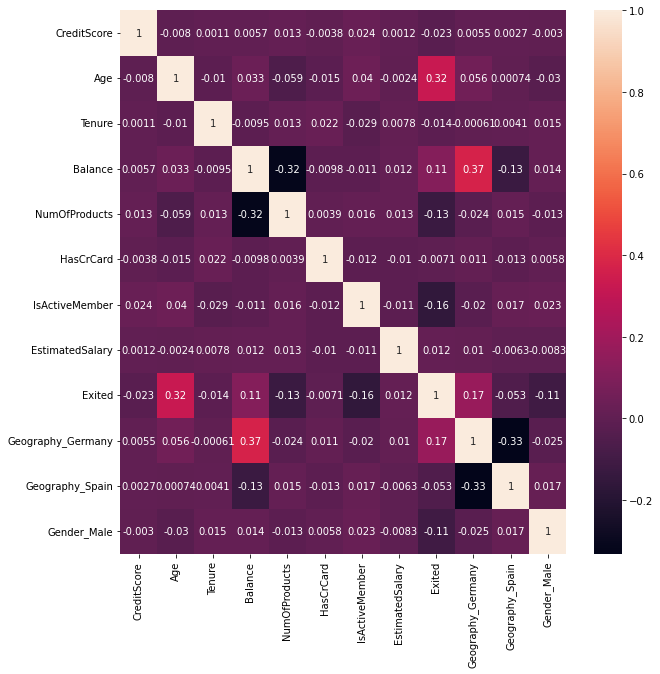

In [11]:
# Finding correlation between dependendent and non - dependent rows
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method="spearman"), annot = True)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

[21.318076351306896,
 13.695781572637243,
 3.8742453441205087,
 3.1877215890090427,
 7.835277696567546,
 3.289971250772043,
 2.151552807806474,
 3.8873346648399183,
 1.4779604934755468,
 1.8164517940213727,
 1.4862568078789002,
 2.192417876399789]

In [14]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [15]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [16]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2, random_state=123)
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [18]:
X_train_transform = st.fit_transform(X_train)
X_test_transforn = st.transform(X_test)

# Building Deeplearning model

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [63]:
# creating ANN Model
model = Sequential()

# adding Dense Layer
model.add(Dense(14, activation='relu', input_dim = 11))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 14)                168       
                                                                 
 dense_8 (Dense)             (None, 8)                 120       
                                                                 
 dense_9 (Dense)             (None, 3)                 27        
                                                                 
 dense_10 (Dense)            (None, 1)                 4         
                                                                 
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer='Adam', metrics=["accuracy"])

In [66]:
history = model.fit(X_train_transform, y_train, epochs=80)

Epoch 1/80
250/250 [==============================] - 2s 3ms/step - loss: 0.5965 - accuracy: 0.7592
Epoch 2/80
250/250 [==============================] - 1s 2ms/step - loss: 0.4497 - accuracy: 0.8066
Epoch 3/80
250/250 [==============================] - 1s 2ms/step - loss: 0.4240 - accuracy: 0.8213
Epoch 4/80
250/250 [==============================] - 1s 2ms/step - loss: 0.4165 - accuracy: 0.8254
Epoch 5/80
250/250 [==============================] - 1s 2ms/step - loss: 0.4118 - accuracy: 0.8285
Epoch 6/80
250/250 [==============================] - 1s 2ms/step - loss: 0.4076 - accuracy: 0.8321
Epoch 7/80
250/250 [==============================] - 1s 2ms/step - loss: 0.4017 - accuracy: 0.8350
Epoch 8/80
250/250 [==============================] - 1s 2ms/step - loss: 0.3933 - accuracy: 0.8394
Epoch 9/80
250/250 [==============================] - 1s 2ms/step - loss: 0.3803 - accuracy: 0.8445
Epoch 10/80
250/250 [==============================] - 1s 2ms/step - loss: 0.3671 - accuracy: 0.8510

In [49]:
model.layers[2].get_weights()

[array([[-0.4498266 ],
        [-1.1196043 ],
        [ 1.2937641 ],
        [-0.7680694 ],
        [ 0.7312701 ],
        [ 0.58191043],
        [ 1.5650026 ],
        [ 1.3656121 ]], dtype=float32),
 array([-0.25350502], dtype=float32)]

In [69]:
# Prediction
y_pred = np.where(0.5>model.predict(X_test_transforn),0,1)

63/63 [==============================] - 0s 2ms/step


In [70]:
accuracy_score(y_test, y_pred)

0.853

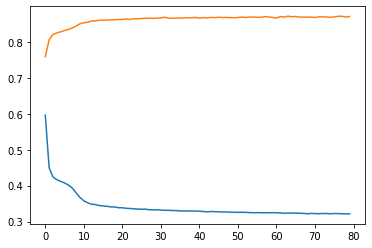

In [68]:
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])